In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy.stats import beta as sp_beta

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings

In [2]:
N = 30
N_INTVS = 5
N_EXPERIMENTS = 500
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

ALPHAS = [0.0001, 0.001, 0.01, 0.1, 1]
BETAS = [0.0001, 0.001, 0.01, 0.1, 1]

In [11]:
pof_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        # print(a, b)
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            print(a, b, success_count)
            
            (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
                round_=True
            )


            # Leximin
            lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
                sorted_increase_matrix * 10000, CAPACITIES
            )
            with warnings.catch_warnings():
                warnings.simplefilter('ignore')
                lex_assignments = lex_assigner.solve()
            if lex_assignments is False:
                continue
            lex_cost = lex_assigner.get_cost(
                lex_assignments, cost_matrix=sorted_matrix
            )
            
            # Efficient
            eff_assigner = assignment.AssignmentHelperV2(
                sorted_increase_matrix, CAPACITIES
            )
            eff_assignments = eff_assigner.ip_solve()
            eff_cost = eff_assigner.get_cost(
                eff_assignments, cost_matrix=sorted_matrix
            )

            if eff_cost == 0:
                if lex_cost == 0:
                    pof_pop[a_id][b_id].append(1)
                else:
                    print(sorted_increase_matrix)
                    print(eff_assignments)
                    print(lex_assignments)
                    print(lex_cost)
            else:
                pof_pop[a_id][b_id].append(lex_cost / eff_cost)
            success_count += 1

0.0001 0.0001 0
0.0001 0.0001 1
0.0001 0.0001 2
0.0001 0.0001 3
0.0001 0.0001 4
0.0001 0.0001 5
0.0001 0.0001 6
0.0001 0.0001 7
0.0001 0.0001 8
0.0001 0.0001 9
0.0001 0.0001 10
0.0001 0.0001 11
0.0001 0.0001 12
0.0001 0.0001 13
0.0001 0.0001 14
0.0001 0.0001 15
0.0001 0.0001 16
0.0001 0.0001 17
0.0001 0.0001 18
0.0001 0.0001 19
0.0001 0.0001 20
0.0001 0.0001 21
0.0001 0.0001 22
0.0001 0.0001 23
0.0001 0.0001 24
0.0001 0.0001 25
0.0001 0.0001 26
0.0001 0.0001 27
0.0001 0.0001 28
0.0001 0.0001 29
0.0001 0.0001 30
0.0001 0.0001 31
0.0001 0.0001 32
0.0001 0.0001 33
0.0001 0.0001 34
0.0001 0.0001 35
0.0001 0.0001 36
0.0001 0.0001 37
0.0001 0.0001 38
0.0001 0.0001 39
0.0001 0.0001 40
0.0001 0.0001 41
0.0001 0.0001 42
0.0001 0.0001 43
0.0001 0.0001 44
0.0001 0.0001 45
0.0001 0.0001 46
0.0001 0.0001 47
0.0001 0.0001 48
0.0001 0.0001 49
0.0001 0.0001 50
0.0001 0.0001 51
0.0001 0.0001 52
0.0001 0.0001 53
0.0001 0.0001 54
0.0001 0.0001 55
0.0001 0.0001 56
0.0001 0.0001 57
0.0001 0.0001 58
0.0001 

0.0001 0.0001 462
0.0001 0.0001 463
0.0001 0.0001 464
0.0001 0.0001 465
0.0001 0.0001 466
0.0001 0.0001 467
0.0001 0.0001 468
0.0001 0.0001 469
0.0001 0.0001 470
0.0001 0.0001 471
0.0001 0.0001 472
0.0001 0.0001 473
0.0001 0.0001 474
0.0001 0.0001 475
0.0001 0.0001 476
0.0001 0.0001 477
0.0001 0.0001 478
0.0001 0.0001 479
0.0001 0.0001 480
0.0001 0.0001 481
0.0001 0.0001 482
0.0001 0.0001 483
0.0001 0.0001 484
0.0001 0.0001 485
0.0001 0.0001 486
0.0001 0.0001 487
0.0001 0.0001 488
0.0001 0.0001 489
0.0001 0.0001 490
0.0001 0.0001 491
0.0001 0.0001 492
0.0001 0.0001 493
0.0001 0.0001 494
0.0001 0.0001 495
0.0001 0.0001 496
0.0001 0.0001 497
0.0001 0.0001 498
0.0001 0.0001 499
0.0001 0.001 0
0.0001 0.001 1
0.0001 0.001 2
0.0001 0.001 3
0.0001 0.001 4
0.0001 0.001 5
0.0001 0.001 6
0.0001 0.001 7
0.0001 0.001 8
0.0001 0.001 9
0.0001 0.001 10
0.0001 0.001 11
0.0001 0.001 12
0.0001 0.001 13
0.0001 0.001 14
0.0001 0.001 15
0.0001 0.001 16
0.0001 0.001 17
0.0001 0.001 18
0.0001 0.001 19
0.0001

0.0001 0.001 449
0.0001 0.001 450
0.0001 0.001 451
0.0001 0.001 452
0.0001 0.001 453
0.0001 0.001 454
0.0001 0.001 455
0.0001 0.001 456
0.0001 0.001 457
0.0001 0.001 458
0.0001 0.001 459
0.0001 0.001 460
0.0001 0.001 461
0.0001 0.001 462
0.0001 0.001 463
0.0001 0.001 464
0.0001 0.001 465
0.0001 0.001 466
0.0001 0.001 467
0.0001 0.001 468
0.0001 0.001 469
0.0001 0.001 470
0.0001 0.001 471
0.0001 0.001 472
0.0001 0.001 473
0.0001 0.001 474
0.0001 0.001 475
0.0001 0.001 476
0.0001 0.001 477
0.0001 0.001 478
0.0001 0.001 479
0.0001 0.001 480
0.0001 0.001 481
0.0001 0.001 482
0.0001 0.001 483
0.0001 0.001 484
0.0001 0.001 485
0.0001 0.001 486
0.0001 0.001 487
0.0001 0.001 488
0.0001 0.001 489
0.0001 0.001 490
0.0001 0.001 491
0.0001 0.001 492
0.0001 0.001 493
0.0001 0.001 494
0.0001 0.001 495
0.0001 0.001 496
0.0001 0.001 497
0.0001 0.001 498
0.0001 0.001 499
0.0001 0.01 0
0.0001 0.01 1
0.0001 0.01 2
0.0001 0.01 3
0.0001 0.01 4
0.0001 0.01 5
0.0001 0.01 6
0.0001 0.01 7
0.0001 0.01 8
0.0001 

0.0001 0.01 465
0.0001 0.01 466
0.0001 0.01 467
0.0001 0.01 468
0.0001 0.01 469
0.0001 0.01 470
0.0001 0.01 471
0.0001 0.01 472
0.0001 0.01 473
0.0001 0.01 474
0.0001 0.01 475
0.0001 0.01 476
0.0001 0.01 477
0.0001 0.01 478
0.0001 0.01 479
0.0001 0.01 480
0.0001 0.01 481
0.0001 0.01 482
0.0001 0.01 483
0.0001 0.01 484
0.0001 0.01 485
0.0001 0.01 486
0.0001 0.01 487
0.0001 0.01 488
0.0001 0.01 489
0.0001 0.01 490
0.0001 0.01 491
0.0001 0.01 492
0.0001 0.01 493
0.0001 0.01 494
0.0001 0.01 495
0.0001 0.01 496
0.0001 0.01 497
0.0001 0.01 498
0.0001 0.01 499
0.0001 0.1 0
0.0001 0.1 1
0.0001 0.1 2
0.0001 0.1 3
0.0001 0.1 4
0.0001 0.1 5
0.0001 0.1 6
0.0001 0.1 7
0.0001 0.1 8
0.0001 0.1 9
0.0001 0.1 10
0.0001 0.1 11
0.0001 0.1 12
0.0001 0.1 13
0.0001 0.1 14
0.0001 0.1 15
0.0001 0.1 16
0.0001 0.1 17
0.0001 0.1 18
0.0001 0.1 19
0.0001 0.1 20
0.0001 0.1 21
0.0001 0.1 22
0.0001 0.1 23
0.0001 0.1 24
0.0001 0.1 25
0.0001 0.1 26
0.0001 0.1 27
0.0001 0.1 28
0.0001 0.1 29
0.0001 0.1 30
0.0001 0.1 31
0.

0.0001 1 22
0.0001 1 23
0.0001 1 24
0.0001 1 25
0.0001 1 26
0.0001 1 27
0.0001 1 28
0.0001 1 29
0.0001 1 30
0.0001 1 31
0.0001 1 32
0.0001 1 33
0.0001 1 34
0.0001 1 35
0.0001 1 36
0.0001 1 37
0.0001 1 38
0.0001 1 39
0.0001 1 40
0.0001 1 41
0.0001 1 42
0.0001 1 43
0.0001 1 44
0.0001 1 45
0.0001 1 46
0.0001 1 47
0.0001 1 48
0.0001 1 49
0.0001 1 50
0.0001 1 51
0.0001 1 52
0.0001 1 53
0.0001 1 54
0.0001 1 55
0.0001 1 56
0.0001 1 57
0.0001 1 58
0.0001 1 59
0.0001 1 60
0.0001 1 61
0.0001 1 62
0.0001 1 63
0.0001 1 64
0.0001 1 65
0.0001 1 66
0.0001 1 67
0.0001 1 68
0.0001 1 69
0.0001 1 70
0.0001 1 71
0.0001 1 72
0.0001 1 73
0.0001 1 74
0.0001 1 75
0.0001 1 76
0.0001 1 77
0.0001 1 78
0.0001 1 79
0.0001 1 80
0.0001 1 81
0.0001 1 82
0.0001 1 83
0.0001 1 84
0.0001 1 85
0.0001 1 86
0.0001 1 87
0.0001 1 88
0.0001 1 89
0.0001 1 90
0.0001 1 91
0.0001 1 92
0.0001 1 93
0.0001 1 94
0.0001 1 95
0.0001 1 96
0.0001 1 97
0.0001 1 98
0.0001 1 99
0.0001 1 100
0.0001 1 101
0.0001 1 102
0.0001 1 103
0.0001 1 104

0.001 0.0001 128
0.001 0.0001 129
0.001 0.0001 130
0.001 0.0001 131
0.001 0.0001 132
0.001 0.0001 133
0.001 0.0001 134
0.001 0.0001 135
0.001 0.0001 136
0.001 0.0001 137
0.001 0.0001 138
0.001 0.0001 139
0.001 0.0001 140
0.001 0.0001 141
0.001 0.0001 142
0.001 0.0001 143
0.001 0.0001 144
0.001 0.0001 145
0.001 0.0001 146
0.001 0.0001 147
0.001 0.0001 148
0.001 0.0001 149
0.001 0.0001 150
0.001 0.0001 151
0.001 0.0001 152
0.001 0.0001 153
0.001 0.0001 154
0.001 0.0001 155
0.001 0.0001 156
0.001 0.0001 157
0.001 0.0001 158
0.001 0.0001 159
0.001 0.0001 160
0.001 0.0001 161
0.001 0.0001 162
0.001 0.0001 163
0.001 0.0001 164
0.001 0.0001 165
0.001 0.0001 166
0.001 0.0001 167
0.001 0.0001 168
0.001 0.0001 169
0.001 0.0001 170
0.001 0.0001 171
0.001 0.0001 172
0.001 0.0001 173
0.001 0.0001 174
0.001 0.0001 175
0.001 0.0001 176
0.001 0.0001 177
0.001 0.0001 178
0.001 0.0001 179
0.001 0.0001 180
0.001 0.0001 181
0.001 0.0001 182
0.001 0.0001 183
0.001 0.0001 184
0.001 0.0001 185
0.001 0.0001 1

0.001 0.001 124
0.001 0.001 125
0.001 0.001 126
0.001 0.001 127
0.001 0.001 128
0.001 0.001 129
0.001 0.001 130
0.001 0.001 131
0.001 0.001 132
0.001 0.001 133
0.001 0.001 134
0.001 0.001 135
0.001 0.001 136
0.001 0.001 137
0.001 0.001 138
0.001 0.001 139
0.001 0.001 140
0.001 0.001 141
0.001 0.001 142
0.001 0.001 143
0.001 0.001 144
0.001 0.001 145
0.001 0.001 146
0.001 0.001 147
0.001 0.001 148
0.001 0.001 149
0.001 0.001 150
0.001 0.001 151
0.001 0.001 152
0.001 0.001 153
0.001 0.001 154
0.001 0.001 155
0.001 0.001 156
0.001 0.001 157
0.001 0.001 158
0.001 0.001 159
0.001 0.001 160
0.001 0.001 161
0.001 0.001 162
0.001 0.001 163
0.001 0.001 164
0.001 0.001 165
0.001 0.001 166
0.001 0.001 167
0.001 0.001 168
0.001 0.001 169
0.001 0.001 170
0.001 0.001 171
0.001 0.001 172
0.001 0.001 173
0.001 0.001 174
0.001 0.001 175
0.001 0.001 176
0.001 0.001 177
0.001 0.001 178
0.001 0.001 179
0.001 0.001 180
0.001 0.001 181
0.001 0.001 182
0.001 0.001 183
0.001 0.001 184
0.001 0.001 185
0.001 0.

0.001 0.01 153
0.001 0.01 154
0.001 0.01 155
0.001 0.01 156
0.001 0.01 157
0.001 0.01 158
0.001 0.01 159
0.001 0.01 160
0.001 0.01 161
0.001 0.01 162
0.001 0.01 163
0.001 0.01 164
0.001 0.01 165
0.001 0.01 166
0.001 0.01 167
0.001 0.01 168
0.001 0.01 169
0.001 0.01 170
0.001 0.01 171
0.001 0.01 172
0.001 0.01 173
0.001 0.01 174
0.001 0.01 175
0.001 0.01 176
0.001 0.01 177
0.001 0.01 178
0.001 0.01 179
0.001 0.01 180
0.001 0.01 181
0.001 0.01 182
0.001 0.01 183
0.001 0.01 184
0.001 0.01 185
0.001 0.01 186
0.001 0.01 187
0.001 0.01 188
0.001 0.01 189
0.001 0.01 190
0.001 0.01 191
0.001 0.01 192
0.001 0.01 193
0.001 0.01 194
0.001 0.01 195
0.001 0.01 196
0.001 0.01 197
0.001 0.01 198
0.001 0.01 199
0.001 0.01 200
0.001 0.01 201
0.001 0.01 202
0.001 0.01 203
0.001 0.01 204
0.001 0.01 205
0.001 0.01 206
0.001 0.01 207
0.001 0.01 208
0.001 0.01 209
0.001 0.01 210
0.001 0.01 211
0.001 0.01 212
0.001 0.01 213
0.001 0.01 214
0.001 0.01 215
0.001 0.01 216
0.001 0.01 217
0.001 0.01 218
0.001 0.01

0.001 0.1 222
0.001 0.1 223
0.001 0.1 224
0.001 0.1 225
0.001 0.1 226
0.001 0.1 227
0.001 0.1 228
0.001 0.1 229
0.001 0.1 230
0.001 0.1 231
0.001 0.1 232
0.001 0.1 233
0.001 0.1 234
0.001 0.1 235
0.001 0.1 236
0.001 0.1 237
0.001 0.1 238
0.001 0.1 239
0.001 0.1 240
0.001 0.1 241
0.001 0.1 242
0.001 0.1 243
0.001 0.1 244
0.001 0.1 245
0.001 0.1 246
0.001 0.1 247
0.001 0.1 248
0.001 0.1 249
0.001 0.1 250
0.001 0.1 251
0.001 0.1 252
0.001 0.1 253
0.001 0.1 254
0.001 0.1 255
0.001 0.1 256
0.001 0.1 257
0.001 0.1 258
0.001 0.1 259
0.001 0.1 260
0.001 0.1 261
0.001 0.1 262
0.001 0.1 263
0.001 0.1 264
0.001 0.1 265
0.001 0.1 266
0.001 0.1 267
0.001 0.1 268
0.001 0.1 269
0.001 0.1 270
0.001 0.1 271
0.001 0.1 272
0.001 0.1 273
0.001 0.1 274
0.001 0.1 275
0.001 0.1 276
0.001 0.1 277
0.001 0.1 278
0.001 0.1 279
0.001 0.1 280
0.001 0.1 281
0.001 0.1 282
0.001 0.1 283
0.001 0.1 284
0.001 0.1 285
0.001 0.1 286
0.001 0.1 287
0.001 0.1 288
0.001 0.1 289
0.001 0.1 290
0.001 0.1 291
0.001 0.1 292
0.001 

0.001 1 368
0.001 1 369
0.001 1 370
0.001 1 371
0.001 1 372
0.001 1 373
0.001 1 374
0.001 1 375
0.001 1 376
0.001 1 377
0.001 1 378
0.001 1 379
0.001 1 380
0.001 1 381
0.001 1 382
0.001 1 383
0.001 1 384
0.001 1 385
0.001 1 386
0.001 1 387
0.001 1 388
0.001 1 389
0.001 1 390
0.001 1 391
0.001 1 392
0.001 1 393
0.001 1 394
0.001 1 395
0.001 1 396
0.001 1 397
0.001 1 398
0.001 1 399
0.001 1 400
0.001 1 401
0.001 1 402
0.001 1 403
0.001 1 404
0.001 1 405
0.001 1 406
0.001 1 407
0.001 1 408
0.001 1 409
0.001 1 410
0.001 1 411
0.001 1 412
0.001 1 413
0.001 1 414
0.001 1 415
0.001 1 416
0.001 1 417
0.001 1 418
0.001 1 419
0.001 1 420
0.001 1 421
0.001 1 422
0.001 1 423
0.001 1 424
0.001 1 425
0.001 1 426
0.001 1 427
0.001 1 428
0.001 1 429
0.001 1 430
0.001 1 431
0.001 1 432
0.001 1 433
0.001 1 434
0.001 1 435
0.001 1 436
0.001 1 437
0.001 1 438
0.001 1 439
0.001 1 440
0.001 1 441
0.001 1 442
0.001 1 443
0.001 1 444
0.001 1 445
0.001 1 446
0.001 1 447
0.001 1 448
0.001 1 449
0.001 1 450
0.00

0.01 0.0001 420
0.01 0.0001 421
0.01 0.0001 422
0.01 0.0001 423
0.01 0.0001 424
0.01 0.0001 425
0.01 0.0001 426
0.01 0.0001 427
0.01 0.0001 428
0.01 0.0001 429
0.01 0.0001 430
0.01 0.0001 431
0.01 0.0001 432
0.01 0.0001 433
0.01 0.0001 434
0.01 0.0001 435
0.01 0.0001 436
0.01 0.0001 437
0.01 0.0001 438
0.01 0.0001 439
0.01 0.0001 440
0.01 0.0001 441
0.01 0.0001 442
0.01 0.0001 443
0.01 0.0001 444
0.01 0.0001 445
0.01 0.0001 446
0.01 0.0001 447
0.01 0.0001 448
0.01 0.0001 449
0.01 0.0001 450
0.01 0.0001 451
0.01 0.0001 452
0.01 0.0001 453
0.01 0.0001 454
0.01 0.0001 455
0.01 0.0001 456
0.01 0.0001 457
0.01 0.0001 458
0.01 0.0001 459
0.01 0.0001 460
0.01 0.0001 461
0.01 0.0001 462
0.01 0.0001 463
0.01 0.0001 464
0.01 0.0001 465
0.01 0.0001 466
0.01 0.0001 467
0.01 0.0001 468
0.01 0.0001 469
0.01 0.0001 470
0.01 0.0001 471
0.01 0.0001 472
0.01 0.0001 473
0.01 0.0001 474
0.01 0.0001 475
0.01 0.0001 476
0.01 0.0001 477
0.01 0.0001 478
0.01 0.0001 479
0.01 0.0001 480
0.01 0.0001 481
0.01 0.0

0.01 0.001 469
0.01 0.001 470
0.01 0.001 471
0.01 0.001 472
0.01 0.001 473
0.01 0.001 474
0.01 0.001 475
0.01 0.001 476
0.01 0.001 477
0.01 0.001 478
0.01 0.001 479
0.01 0.001 480
0.01 0.001 481
0.01 0.001 482
0.01 0.001 483
0.01 0.001 484
0.01 0.001 485
0.01 0.001 486
0.01 0.001 487
0.01 0.001 488
0.01 0.001 489
0.01 0.001 490
0.01 0.001 491
0.01 0.001 492
0.01 0.001 493
0.01 0.001 494
0.01 0.001 495
0.01 0.001 496
0.01 0.001 497
0.01 0.001 498
0.01 0.001 499
0.01 0.01 0
0.01 0.01 1
0.01 0.01 2
0.01 0.01 3
0.01 0.01 4
0.01 0.01 5
0.01 0.01 6
0.01 0.01 7
0.01 0.01 8
0.01 0.01 9
0.01 0.01 10
0.01 0.01 11
0.01 0.01 12
0.01 0.01 13
0.01 0.01 14
0.01 0.01 15
0.01 0.01 16
0.01 0.01 17
0.01 0.01 18
0.01 0.01 19
0.01 0.01 20
0.01 0.01 21
0.01 0.01 22
0.01 0.01 23
0.01 0.01 24
0.01 0.01 25
0.01 0.01 26
0.01 0.01 27
0.01 0.01 28
0.01 0.01 29
0.01 0.01 30
0.01 0.01 31
0.01 0.01 32
0.01 0.01 33
0.01 0.01 34
0.01 0.01 35
0.01 0.01 36
0.01 0.01 37
0.01 0.01 38
0.01 0.01 39
0.01 0.01 40
0.01 0.01 41

0.01 0.1 70
0.01 0.1 71
0.01 0.1 72
0.01 0.1 73
0.01 0.1 74
0.01 0.1 75
0.01 0.1 76
0.01 0.1 77
0.01 0.1 78
0.01 0.1 79
0.01 0.1 80
0.01 0.1 81
0.01 0.1 82
0.01 0.1 83
0.01 0.1 84
0.01 0.1 85
0.01 0.1 86
0.01 0.1 87
0.01 0.1 88
0.01 0.1 89
0.01 0.1 90
0.01 0.1 91
0.01 0.1 92
0.01 0.1 93
0.01 0.1 94
0.01 0.1 95
0.01 0.1 96
0.01 0.1 97
0.01 0.1 98
0.01 0.1 99
0.01 0.1 100
0.01 0.1 101
0.01 0.1 102
0.01 0.1 103
0.01 0.1 104
0.01 0.1 105
0.01 0.1 106
0.01 0.1 107
0.01 0.1 108
0.01 0.1 109
0.01 0.1 110
0.01 0.1 111
0.01 0.1 112
0.01 0.1 113
0.01 0.1 114
0.01 0.1 115
0.01 0.1 116
0.01 0.1 117
0.01 0.1 118
0.01 0.1 119
0.01 0.1 120
0.01 0.1 121
0.01 0.1 122
0.01 0.1 123
0.01 0.1 124
0.01 0.1 125
0.01 0.1 126
0.01 0.1 127
0.01 0.1 128
0.01 0.1 129
0.01 0.1 130
0.01 0.1 131
0.01 0.1 132
0.01 0.1 133
0.01 0.1 134
0.01 0.1 135
0.01 0.1 136
0.01 0.1 137
0.01 0.1 138
0.01 0.1 139
0.01 0.1 140
0.01 0.1 141
0.01 0.1 142
0.01 0.1 143
0.01 0.1 144
0.01 0.1 145
0.01 0.1 146
0.01 0.1 147
0.01 0.1 148
0.0

0.01 1 250
0.01 1 251
0.01 1 252
0.01 1 253
0.01 1 254
0.01 1 255
0.01 1 256
0.01 1 257
0.01 1 258
0.01 1 259
0.01 1 260
0.01 1 261
0.01 1 262
0.01 1 263
0.01 1 264
0.01 1 265
0.01 1 266
0.01 1 267
0.01 1 268
0.01 1 269
0.01 1 270
0.01 1 271
0.01 1 272
0.01 1 273
0.01 1 274
0.01 1 275
0.01 1 276
0.01 1 277
0.01 1 278
0.01 1 279
0.01 1 280
0.01 1 281
0.01 1 282
0.01 1 283
0.01 1 284
0.01 1 285
0.01 1 286
0.01 1 287
0.01 1 288
0.01 1 289
0.01 1 290
0.01 1 291
0.01 1 292
0.01 1 293
0.01 1 294
0.01 1 295
0.01 1 296
0.01 1 297
0.01 1 298
0.01 1 299
0.01 1 300
0.01 1 301
0.01 1 302
0.01 1 303
0.01 1 304
0.01 1 305
0.01 1 306
0.01 1 307
0.01 1 308
0.01 1 309
0.01 1 310
0.01 1 311
0.01 1 312
0.01 1 313
0.01 1 314
0.01 1 315
0.01 1 316
0.01 1 317
0.01 1 318
0.01 1 319
0.01 1 320
0.01 1 321
0.01 1 322
0.01 1 323
0.01 1 324
0.01 1 325
0.01 1 326
0.01 1 327
0.01 1 328
0.01 1 329
0.01 1 330
0.01 1 331
0.01 1 332
0.01 1 333
0.01 1 334
0.01 1 335
0.01 1 336
0.01 1 337
0.01 1 338
0.01 1 339
0.01 1 340

0.1 0.0001 371
0.1 0.0001 372
0.1 0.0001 373
0.1 0.0001 374
0.1 0.0001 375
0.1 0.0001 376
0.1 0.0001 377
0.1 0.0001 378
0.1 0.0001 379
0.1 0.0001 380
0.1 0.0001 381
0.1 0.0001 382
0.1 0.0001 383
0.1 0.0001 384
0.1 0.0001 385
0.1 0.0001 386
0.1 0.0001 387
0.1 0.0001 388
0.1 0.0001 389
0.1 0.0001 390
0.1 0.0001 391
0.1 0.0001 392
0.1 0.0001 393
0.1 0.0001 394
0.1 0.0001 395
0.1 0.0001 396
0.1 0.0001 397
0.1 0.0001 398
0.1 0.0001 399
0.1 0.0001 400
0.1 0.0001 401
0.1 0.0001 402
0.1 0.0001 403
0.1 0.0001 404
0.1 0.0001 405
0.1 0.0001 406
0.1 0.0001 407
0.1 0.0001 408
0.1 0.0001 409
0.1 0.0001 410
0.1 0.0001 411
0.1 0.0001 412
0.1 0.0001 413
0.1 0.0001 414
0.1 0.0001 415
0.1 0.0001 416
0.1 0.0001 417
0.1 0.0001 418
0.1 0.0001 419
0.1 0.0001 420
0.1 0.0001 421
0.1 0.0001 422
0.1 0.0001 423
0.1 0.0001 424
0.1 0.0001 425
0.1 0.0001 426
0.1 0.0001 427
0.1 0.0001 428
0.1 0.0001 429
0.1 0.0001 430
0.1 0.0001 431
0.1 0.0001 432
0.1 0.0001 433
0.1 0.0001 434
0.1 0.0001 435
0.1 0.0001 436
0.1 0.0001

0.1 0.001 455
0.1 0.001 456
0.1 0.001 457
0.1 0.001 458
0.1 0.001 459
0.1 0.001 460
0.1 0.001 461
0.1 0.001 462
0.1 0.001 463
0.1 0.001 464
0.1 0.001 465
0.1 0.001 466
0.1 0.001 467
0.1 0.001 468
0.1 0.001 469
0.1 0.001 470
0.1 0.001 471
0.1 0.001 472
0.1 0.001 473
0.1 0.001 474
0.1 0.001 475
0.1 0.001 476
0.1 0.001 477
0.1 0.001 478
0.1 0.001 479
0.1 0.001 480
0.1 0.001 481
0.1 0.001 482
0.1 0.001 483
0.1 0.001 484
0.1 0.001 485
0.1 0.001 486
0.1 0.001 487
0.1 0.001 488
0.1 0.001 489
0.1 0.001 490
0.1 0.001 491
0.1 0.001 492
0.1 0.001 493
0.1 0.001 494
0.1 0.001 495
0.1 0.001 496
0.1 0.001 497
0.1 0.001 498
0.1 0.001 499
0.1 0.01 0
0.1 0.01 1
0.1 0.01 2
0.1 0.01 3
0.1 0.01 4
0.1 0.01 5
0.1 0.01 6
0.1 0.01 7
0.1 0.01 8
0.1 0.01 9
0.1 0.01 10
0.1 0.01 11
0.1 0.01 12
0.1 0.01 13
0.1 0.01 14
0.1 0.01 15
0.1 0.01 16
0.1 0.01 17
0.1 0.01 18
0.1 0.01 19
0.1 0.01 20
0.1 0.01 21
0.1 0.01 22
0.1 0.01 23
0.1 0.01 24
0.1 0.01 25
0.1 0.01 26
0.1 0.01 27
0.1 0.01 28
0.1 0.01 29
0.1 0.01 30
0.1 0.01

0.1 0.1 104
0.1 0.1 105
0.1 0.1 106
0.1 0.1 107
0.1 0.1 108
0.1 0.1 109
0.1 0.1 110
0.1 0.1 110
0.1 0.1 111
0.1 0.1 112
0.1 0.1 113
0.1 0.1 114
0.1 0.1 115
0.1 0.1 116
0.1 0.1 117
0.1 0.1 118
0.1 0.1 119
0.1 0.1 120
0.1 0.1 120
0.1 0.1 121
0.1 0.1 122
0.1 0.1 122
0.1 0.1 123
0.1 0.1 124
0.1 0.1 125
0.1 0.1 126
0.1 0.1 127
0.1 0.1 127
0.1 0.1 128
0.1 0.1 129
0.1 0.1 130
0.1 0.1 131
0.1 0.1 132
0.1 0.1 133
0.1 0.1 134
0.1 0.1 135
0.1 0.1 136
0.1 0.1 137
0.1 0.1 138
0.1 0.1 139
0.1 0.1 140
0.1 0.1 141
0.1 0.1 142
0.1 0.1 143
0.1 0.1 143
0.1 0.1 144
0.1 0.1 145
0.1 0.1 146
0.1 0.1 147
0.1 0.1 148
0.1 0.1 149
0.1 0.1 150
0.1 0.1 151
0.1 0.1 152
0.1 0.1 153
0.1 0.1 154
0.1 0.1 155
0.1 0.1 156
0.1 0.1 157
0.1 0.1 158
0.1 0.1 159
0.1 0.1 160
0.1 0.1 161
0.1 0.1 162
0.1 0.1 163
0.1 0.1 164
0.1 0.1 165
0.1 0.1 166
0.1 0.1 167
0.1 0.1 168
0.1 0.1 169
0.1 0.1 170
0.1 0.1 171
0.1 0.1 171
0.1 0.1 172
0.1 0.1 173
0.1 0.1 174
0.1 0.1 175
0.1 0.1 176
0.1 0.1 177
0.1 0.1 177
0.1 0.1 178
0.1 0.1 179
0.1 

0.1 1 299
0.1 1 300
0.1 1 301
0.1 1 302
0.1 1 303
0.1 1 304
0.1 1 305
0.1 1 306
0.1 1 307
0.1 1 308
0.1 1 309
0.1 1 310
0.1 1 311
0.1 1 312
0.1 1 313
0.1 1 313
0.1 1 313
0.1 1 314
0.1 1 315
0.1 1 316
0.1 1 317
0.1 1 318
0.1 1 319
0.1 1 320
0.1 1 321
0.1 1 322
0.1 1 323
0.1 1 324
0.1 1 324
0.1 1 325
0.1 1 326
0.1 1 327
0.1 1 328
0.1 1 329
0.1 1 330
0.1 1 331
0.1 1 332
0.1 1 333
0.1 1 334
0.1 1 335
0.1 1 336
0.1 1 337
0.1 1 338
0.1 1 338
0.1 1 339
0.1 1 340
0.1 1 341
0.1 1 342
0.1 1 343
0.1 1 344
0.1 1 345
0.1 1 346
0.1 1 346
0.1 1 347
0.1 1 348
0.1 1 349
0.1 1 350
0.1 1 351
0.1 1 352
0.1 1 353
0.1 1 354
0.1 1 355
0.1 1 356
0.1 1 357
0.1 1 358
0.1 1 359
0.1 1 360
0.1 1 361
0.1 1 362
0.1 1 362
0.1 1 362
0.1 1 363
0.1 1 364
0.1 1 365
0.1 1 365
0.1 1 366
0.1 1 367
0.1 1 368
0.1 1 369
0.1 1 370
0.1 1 371
0.1 1 372
0.1 1 372
0.1 1 373
0.1 1 374
0.1 1 375
0.1 1 376
0.1 1 377
0.1 1 378
0.1 1 378
0.1 1 379
0.1 1 380
0.1 1 380
0.1 1 381
0.1 1 382
0.1 1 383
0.1 1 384
0.1 1 385
0.1 1 386
0.1 1 387


1 0.0001 463
1 0.0001 464
1 0.0001 465
1 0.0001 466
1 0.0001 467
1 0.0001 468
1 0.0001 469
1 0.0001 470
1 0.0001 471
1 0.0001 472
1 0.0001 473
1 0.0001 474
1 0.0001 475
1 0.0001 476
1 0.0001 477
1 0.0001 478
1 0.0001 479
1 0.0001 480
1 0.0001 481
1 0.0001 482
1 0.0001 483
1 0.0001 484
1 0.0001 485
1 0.0001 486
1 0.0001 487
1 0.0001 488
1 0.0001 489
1 0.0001 490
1 0.0001 491
1 0.0001 492
1 0.0001 493
1 0.0001 494
1 0.0001 495
1 0.0001 496
1 0.0001 497
1 0.0001 498
1 0.0001 499
1 0.001 0
1 0.001 1
1 0.001 2
1 0.001 3
1 0.001 4
1 0.001 5
1 0.001 6
1 0.001 7
1 0.001 8
1 0.001 9
1 0.001 10
1 0.001 11
1 0.001 12
1 0.001 13
1 0.001 14
1 0.001 15
1 0.001 16
1 0.001 17
1 0.001 18
1 0.001 19
1 0.001 20
1 0.001 21
1 0.001 22
1 0.001 23
1 0.001 24
1 0.001 25
1 0.001 26
1 0.001 27
1 0.001 28
1 0.001 29
1 0.001 30
1 0.001 31
1 0.001 32
1 0.001 33
1 0.001 34
1 0.001 35
1 0.001 36
1 0.001 37
1 0.001 38
1 0.001 39
1 0.001 40
1 0.001 41
1 0.001 42
1 0.001 43
1 0.001 44
1 0.001 45
1 0.001 46
1 0.001 47
1

1 0.01 176
1 0.01 177
1 0.01 178
1 0.01 179
1 0.01 180
1 0.01 181
1 0.01 182
1 0.01 183
1 0.01 184
1 0.01 185
1 0.01 186
1 0.01 187
1 0.01 188
1 0.01 189
1 0.01 190
1 0.01 191
1 0.01 192
1 0.01 193
1 0.01 194
1 0.01 195
1 0.01 196
1 0.01 197
1 0.01 198
1 0.01 199
1 0.01 200
1 0.01 201
1 0.01 202
1 0.01 203
1 0.01 204
1 0.01 205
1 0.01 206
1 0.01 207
1 0.01 208
1 0.01 209
1 0.01 210
1 0.01 211
1 0.01 212
1 0.01 213
1 0.01 214
1 0.01 215
1 0.01 216
1 0.01 217
1 0.01 218
1 0.01 219
1 0.01 220
1 0.01 221
1 0.01 222
1 0.01 222
1 0.01 223
1 0.01 224
1 0.01 225
1 0.01 226
1 0.01 227
1 0.01 228
1 0.01 229
1 0.01 230
1 0.01 231
1 0.01 232
1 0.01 233
1 0.01 234
1 0.01 235
1 0.01 236
1 0.01 237
1 0.01 238
1 0.01 239
1 0.01 240
1 0.01 241
1 0.01 242
1 0.01 243
1 0.01 244
1 0.01 245
1 0.01 246
1 0.01 247
1 0.01 248
1 0.01 249
1 0.01 250
1 0.01 251
1 0.01 252
1 0.01 253
1 0.01 254
1 0.01 255
1 0.01 256
1 0.01 257
1 0.01 258
1 0.01 259
1 0.01 260
1 0.01 261
1 0.01 262
1 0.01 263
1 0.01 264
1 0.01 265

1 0.1 472
1 0.1 473
1 0.1 474
1 0.1 475
1 0.1 476
1 0.1 477
1 0.1 478
1 0.1 479
1 0.1 480
1 0.1 481
1 0.1 482
1 0.1 483
1 0.1 484
1 0.1 485
1 0.1 486
1 0.1 487
1 0.1 488
1 0.1 489
1 0.1 490
1 0.1 491
1 0.1 492
1 0.1 493
1 0.1 494
1 0.1 495
1 0.1 496
1 0.1 497
1 0.1 498
1 0.1 499
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 1 5
1 1 6
1 1 7
1 1 8
1 1 9
1 1 10
1 1 11
1 1 12
1 1 13
1 1 14
1 1 15
1 1 16
1 1 17
1 1 18
1 1 19
1 1 20
1 1 21
1 1 22
1 1 23
1 1 24
1 1 25
1 1 26
1 1 27
1 1 28
1 1 29
1 1 30
1 1 31
1 1 32
1 1 33
1 1 34
1 1 35
1 1 36
1 1 37
1 1 38
1 1 39
1 1 40
1 1 41
1 1 42
1 1 43
1 1 44
1 1 45
1 1 46
1 1 47
1 1 48
1 1 49
1 1 50
1 1 51
1 1 52
1 1 53
1 1 54
1 1 55
1 1 56
1 1 57
1 1 58
1 1 59
1 1 60
1 1 61
1 1 62
1 1 63
1 1 64
1 1 65
1 1 66
1 1 67
1 1 68
1 1 69
1 1 70
1 1 71
1 1 72
1 1 73
1 1 74
1 1 75
1 1 76
1 1 77
1 1 78
1 1 79
1 1 80
1 1 81
1 1 82
1 1 83
1 1 84
1 1 85
1 1 86
1 1 87
1 1 88
1 1 89
1 1 90
1 1 91
1 1 92
1 1 93
1 1 94
1 1 95
1 1 96
1 1 97
1 1 98
1 1 99
1 1 100
1 1 101
1 1 102
1 1 10

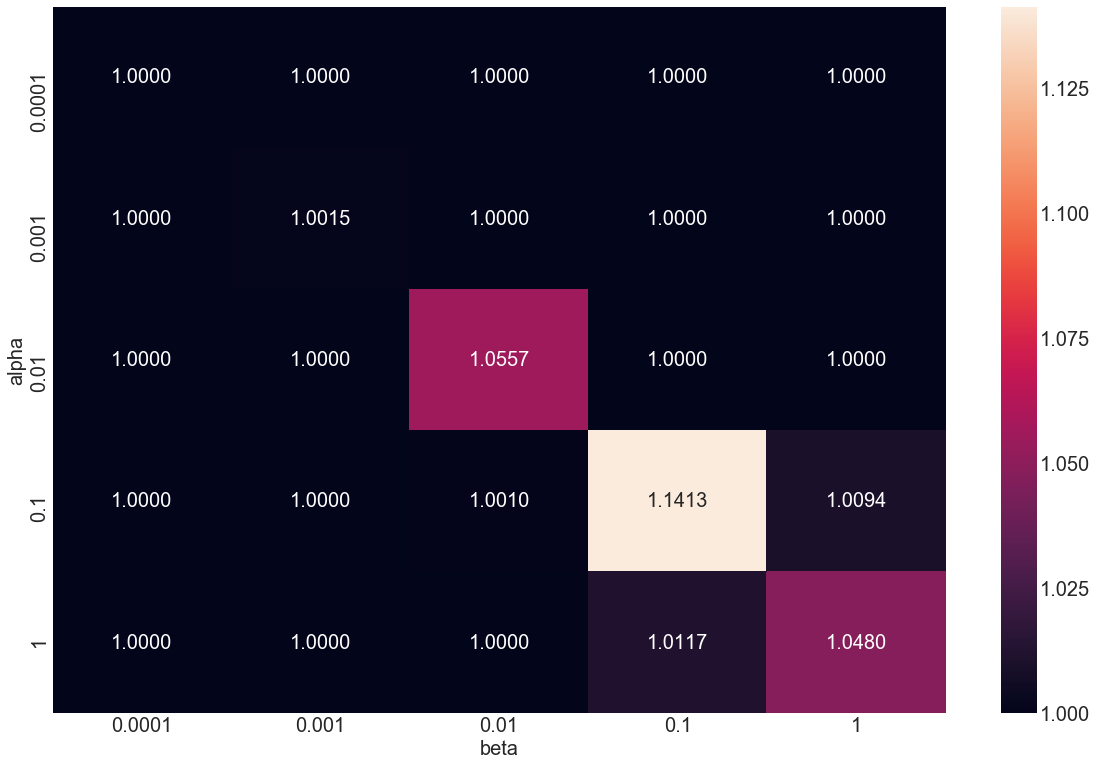

In [12]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

In [3]:
matrix_generator = matrix_gen.MatrixGenerator(
    np.random.beta, (0.0001, 0.0001), N, N_INTVS
)

In [5]:
(_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
    round_=False
)

print(sorted_matrix)
print()
print(sorted_increase_matrix)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.74172001e-78
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99999935e-01
  1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.77050696e-17]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [7.35698705e-72 1.00000000e+00 1.000000

In [6]:
sorted_increase_matrix * 10000

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+04, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.74172001e-74,
        1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.99999935e+03,
        1.00000000e+04],
       [0.00000000e+00, 1.00000000e+04, 1.00000000e+04, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 1.00000000e+04, 1.00000000e+04, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+04, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 1.00000000e+04, 1.00000000e+04, 1.00000000e+04,
        1.00000000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.77050696e-13],
       [0.00000000e+00, 0.0000